In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# Define target and proposal distributions

def target_pdf(x):
    return sts.norm.pdf(x, -4, 0.5) + sts.norm.pdf(x, 4, 1)

def proposal_pdf(x, x0, epsilon):
    return sts.norm.pdf(x, x0, epsilon)

def proposal_rvs(x0, epsilon, size=1):
    return sts.norm.rvs(x0, epsilon, size=size)

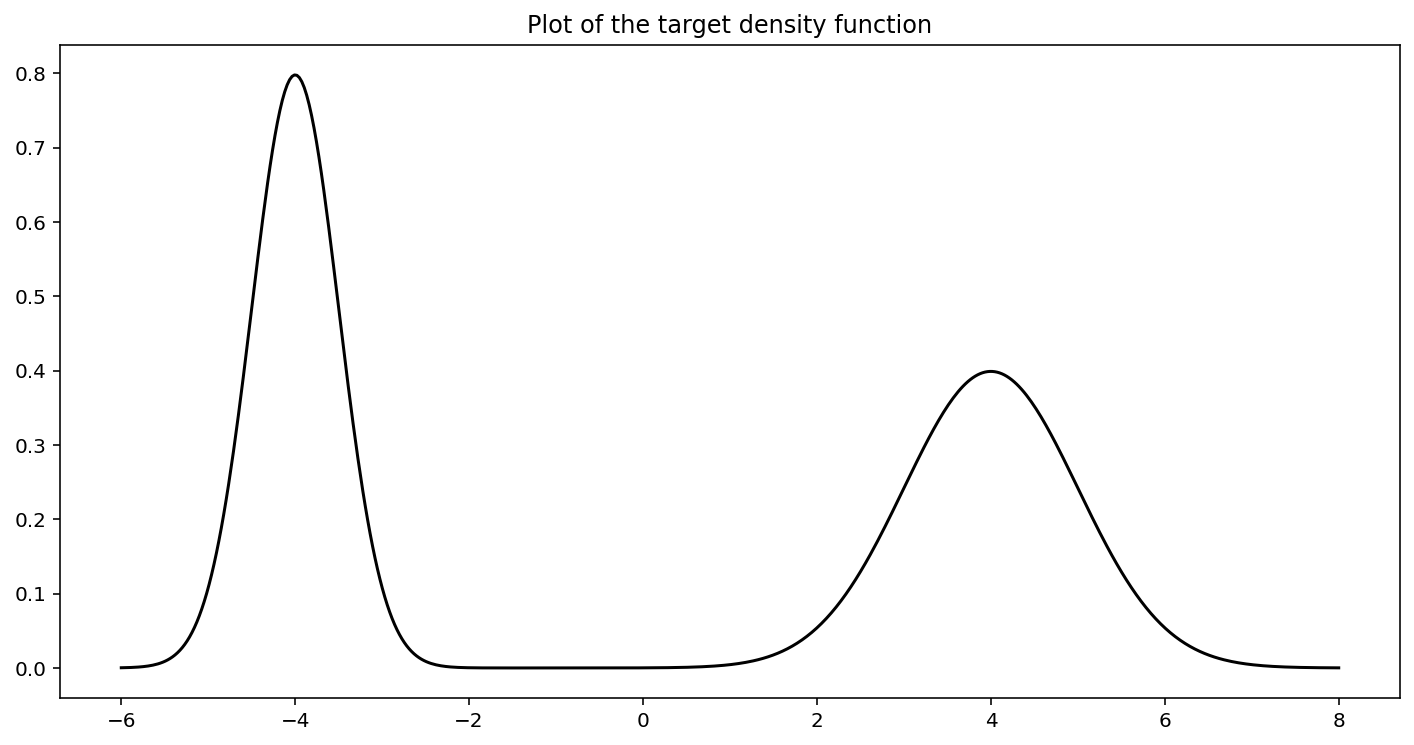

In [2]:
# Plot target distribution

plt.figure(figsize=(12, 6))
plot_x = np.linspace(-6, 8, 500)
plot_y = target_pdf(plot_x)
plt.plot(plot_x, plot_y, 'k-')
plt.title('Plot of the target density function')
plt.show()

In [3]:
def run_monte_carlo(epsilon, num_samples):
    '''
    Run a Metropolis-Hastings sampler using the target and proposal
    distributions defined above.

    Inputs:

        epsilon (float) The width (standard deviation) of the proposal
          distribution.

        num_samples (int) The number of samples to generate.
    '''
    samples = [0]  # Start from 0.
    accepted = 0  # The number of proposed points that were accepted.
    for t in range(num_samples):
        proposed = proposal_rvs(samples[t], epsilon)
        accept_prob = min(1, target_pdf(proposed) / target_pdf(samples[t]) *
                          proposal_pdf(samples[t], proposed, epsilon) /
                          proposal_pdf(proposed, samples[t], epsilon))
        # Flip a biased coin (sample from a binomial) to accept the proposal.
        if (sts.binom.rvs(1, accept_prob) == 1):
            # Accepted
            samples.append(proposed)
            accepted += 1
        else:
            # Rejected, so just repeat the last sample.
            samples.append(samples[t])
    return {
        'samples': samples,
        'acceptance_rate': accepted / num_samples}

In [4]:
epsilon = 1
num_samples = 1000
mc = run_monte_carlo(epsilon, num_samples)

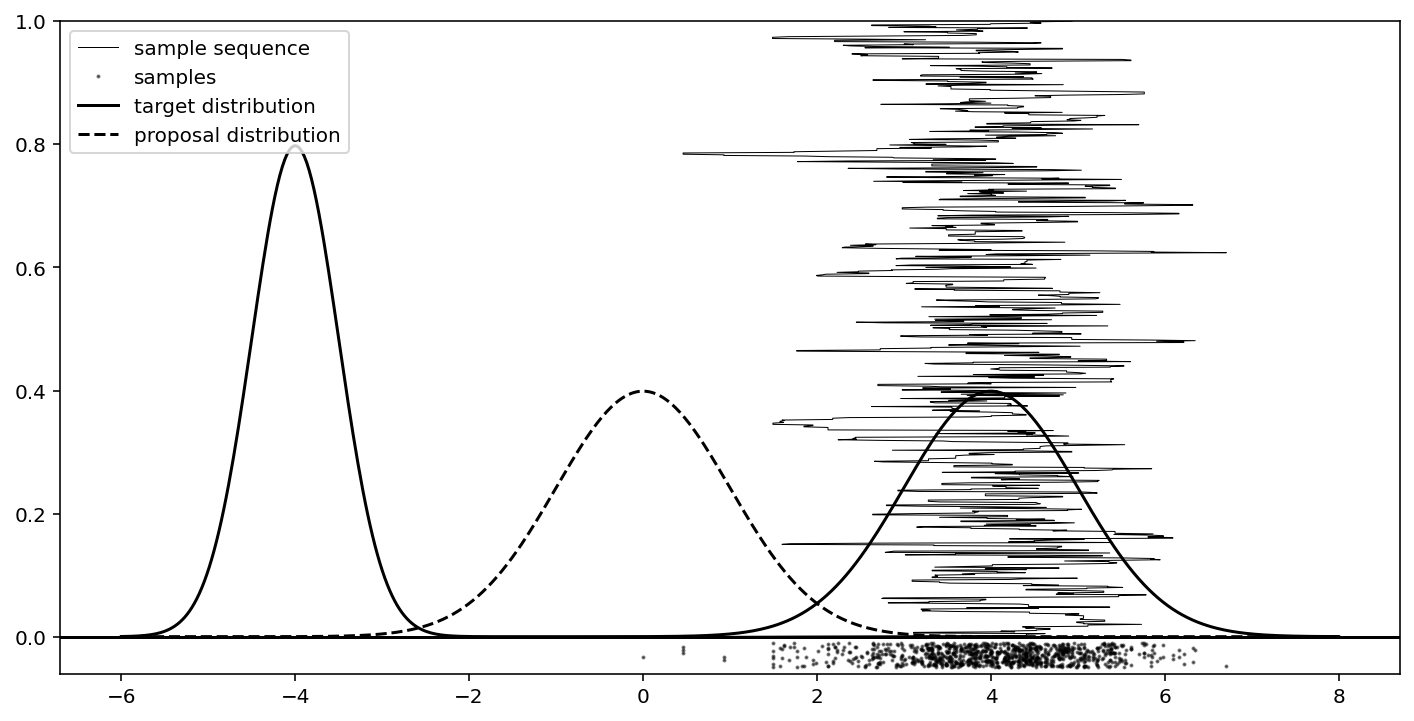

Acceptance rate: 0.708


In [5]:
# Plot of the samples on top of the target distribution
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-6, 8, 500)

plt.plot(
    mc['samples'], np.arange(num_samples+1)/num_samples,
    '-', label='sample sequence', color='black', linewidth=0.5)
plt.plot(
    mc['samples'], sts.uniform.rvs(loc=-0.05, scale=-0.01+0.05, size=num_samples+1),
    'k.', alpha=0.5, markersize=2, label='samples')
plt.plot(plot_x, target_pdf(plot_x), 'k-', label='target distribution')
plt.plot(plot_x, proposal_pdf(plot_x, 0, epsilon), 'k--', label='proposal distribution')
plt.axhline(0, color='black')
plt.ylim(-0.06, 1)
plt.legend()
plt.show()
print('Acceptance rate:', mc['acceptance_rate'])

In [6]:
# This cell takes about 5 minutes to run.

# Visualize accept rate and split of samples between two modes as a function
# of epsilon

num_samples = 10000
epsilon = np.linspace(0.5, 8, 31)

accept = []
split = []
for e in epsilon:
    mc = run_monte_carlo(e, num_samples)
    accept.append(mc['acceptance_rate'])
    s = np.mean(np.array(mc['samples']) < -1)  # Count how many samples are to
                                               # the left and right of -1
    split.append(min(s, 1 - s))

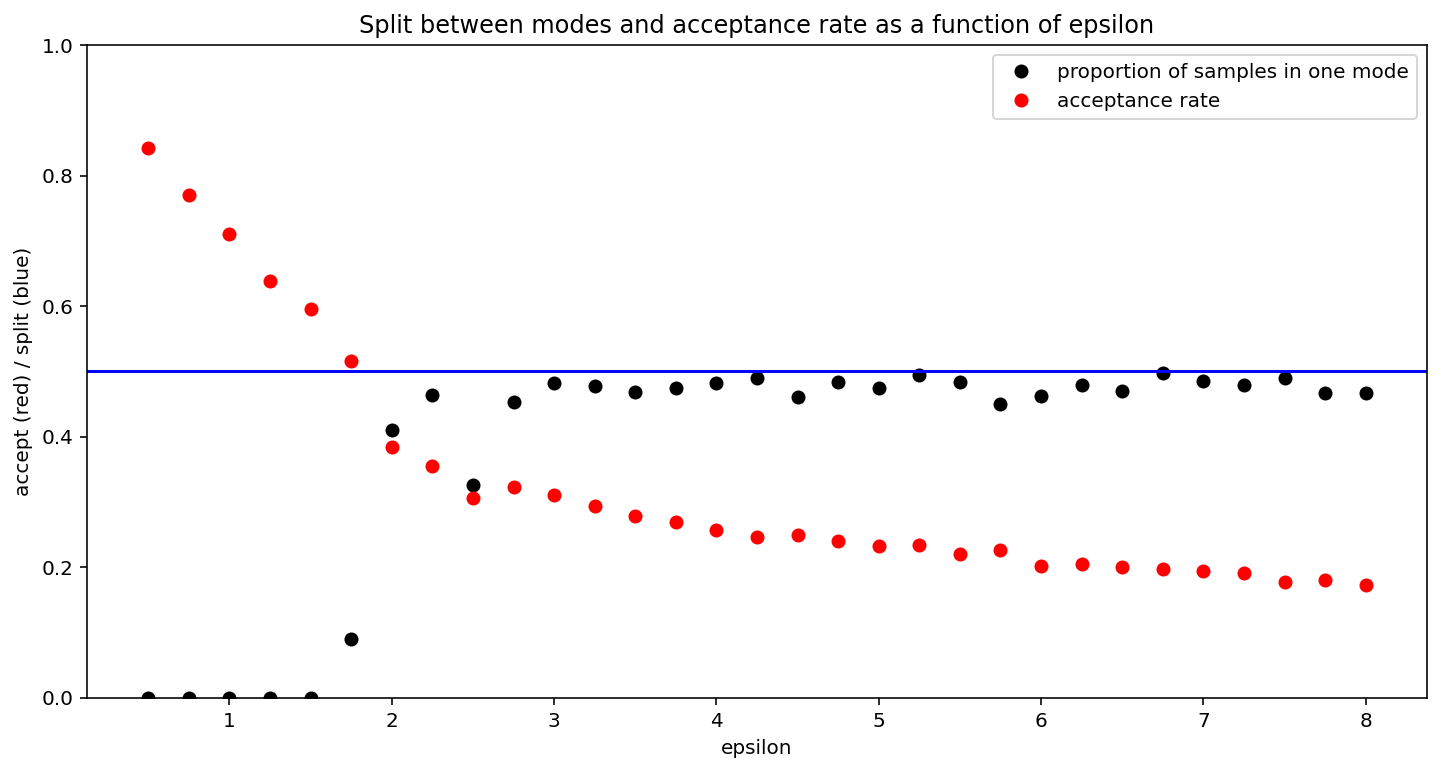

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(epsilon, split, 'ko', label='proportion of samples in one mode')
plt.plot(epsilon, accept, 'ro', label='acceptance rate')
plt.axhline(0.5, color='blue')
plt.legend()
plt.title('Split between modes and acceptance rate as a function of epsilon')
plt.xlabel('epsilon')
plt.ylabel('accept (red) / split (blue)')
plt.ylim(0, 1)
plt.show()